In [7]:
import pandas as pd
df = pd.read_csv("D:/Tugas Akhir/Codingan/Development/App/data/df_train_YESUSFIX.csv")
df.head()

employee_id            domisili jenis_kelamin date_of_birth   join_date  \
0     EM13274  Kota Jakarta Timur     Perempuan    1999-01-23  2021-11-30   
1     EM10730           Tangerang     Laki-laki    1998-04-12  2023-01-31   
2      EM4510    Kabupaten Bekasi     Laki-laki    1981-06-10  2021-10-30   
3      EM2622    Kabupaten Bekasi     Laki-laki    1981-07-26  2021-09-13   
4      EM0633  Kota Jakarta Pusat     Laki-laki    1988-07-07  2022-08-22   

  resign_date marriage_stat  dependant education  absent_90D  ...  \
0  2023-02-02        Single          0        D2         4.0  ...   
1  2024-03-16        Single          0      SLTA         2.0  ...   
2  2023-12-15       Married          2      SLTA         0.0  ...   
3  2023-10-31       Married          3      SLTA         0.0  ...   
4  2023-10-01       Married          1      SLTA         8.0  ...   

   total_income_work income_dependant_ratio work_efficiency  \
0       4.341320e+07           3.100943e+06         1.12750   
1       1.489849e+07           1.146038e+06         1.22500   
2       2.003449e+08           2.671265e+06         1.18125   
3       2.537505e+08           2.537505e+06         1.22000   
4       3.312456e+07           1.274022e+06         1.18250   

   active_work_category  work_stability_score position_score  \
0              Mid-term              2.800000              1   
1              Mid-term              4.333333              1   
2              Mid-term             25.000000              4   
3              Mid-term             25.000000              4   
4              Mid-term              1.444444              1   

  job_income_position_score  education_score  education_income_ratio  \
0              3.100943e+06                3            1.033648e+06   
1              1.146038e+06                1            1.146038e+06   
2              2.003449e+06                1            8.013796e+06   
3              2.537505e+06                1            1.015002e+07   
4              2.548043e+06                1            2.548043e+06   

   weighted_satisfaction_performance  
0                                1.8  
1                                2.6  
2                                3.0  
3                                4.0  
4                                1.8  

[5 rows x 33 columns]

In [8]:
df = df.drop(columns=['active_work_category', 'work_stability_score', 
                      'position_score', 'job_income_position_score',
                      'education_score', 'education_income_ratio',
                      'weighted_satisfaction_performance'])

In [9]:
len(df)

12288

In [10]:
df['churn_status'].value_counts()

churn_status
0    9265
1    3023
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'jenis_kelamin']

X = df.drop(columns=['churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date', 'active_work_months'])
y = df['churn_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
X.columns

Index(['domisili', 'jenis_kelamin', 'marriage_stat', 'dependant', 'education',
       'absent_90D', 'avg_time_work', 'departemen', 'position', 'income',
       'total_komp', 'job_satisfaction', 'performance_rating', 'age_years',
       'active_work', 'income_3_months', 'income_6_months',
       'total_income_work', 'income_dependant_ratio', 'work_efficiency'],
      dtype='object')

In [4]:
X.head()

domisili jenis_kelamin marriage_stat  dependant education  \
0  Kota Jakarta Timur     Perempuan        Single          0        D2   
1           Tangerang     Laki-laki        Single          0      SLTA   
2    Kabupaten Bekasi     Laki-laki       Married          2      SLTA   
3    Kabupaten Bekasi     Laki-laki       Married          3      SLTA   
4  Kota Jakarta Pusat     Laki-laki       Married          1      SLTA   

   absent_90D  avg_time_work                           departemen position  \
0         4.0           9.02  Corporate Strategy & Communications    Staff   
1         2.0           9.80                     Engineering & IT    Staff   
2         0.0           9.45                    Creative & Design  Manager   
3         0.0           9.76                            Marketing  Manager   
4         8.0           9.46                           Operations    Staff   

         income  ...  total_income_work income_dependant_ratio  \
0  3.100943e+06  ...       4.341320e+07           3.100943e+06   
1  1.146038e+06  ...       1.489849e+07           1.146038e+06   
2  8.013796e+06  ...       2.003449e+08           2.671265e+06   
3  1.015002e+07  ...       2.537505e+08           2.537505e+06   
4  2.548043e+06  ...       3.312456e+07           1.274022e+06   

  work_efficiency  active_work_category  work_stability_score  position_score  \
0         1.12750              Mid-term              2.800000               1   
1         1.22500              Mid-term              4.333333               1   
2         1.18125              Mid-term             25.000000               4   
3         1.22000              Mid-term             25.000000               4   
4         1.18250              Mid-term              1.444444               1   

   job_income_position_score  education_score  education_income_ratio  \
0               3.100943e+06                3            1.033648e+06   
1               1.146038e+06                1            1.146038e+06   
2               2.003449e+06                1            8.013796e+06   
3               2.537505e+06                1            1.015002e+07   
4               2.548043e+06                1            2.548043e+06   

   weighted_satisfaction_performance  
0                                1.8  
1                                2.6  
2                                3.0  
3                                4.0  
4                                1.8  

[5 rows x 27 columns]

In [4]:
print("Training: ", y_train.value_counts())
print("Testing: ", y_test.value_counts())

Training:  churn_status
0    7412
1    2418
Name: count, dtype: int64
Testing:  churn_status
0    1853
1     605
Name: count, dtype: int64


In [6]:
len(X_train)

9830

In [7]:
len(X_test)

2458

In [8]:
from catboost import CatBoostClassifier
import pandas as pd

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.01,
    depth=6,
    cat_features= cat_feature,
    loss_function='Logloss',
    eval_metric='AUC',
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    verbose=200
)

# Melatih model
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

0:	test: 0.9470753	best: 0.9470753 (0)	total: 295ms	remaining: 4m 54s
200:	test: 0.9734485	best: 0.9734485 (200)	total: 21.1s	remaining: 1m 23s
400:	test: 0.9768800	best: 0.9768889 (399)	total: 40.8s	remaining: 1m 1s
600:	test: 0.9777925	best: 0.9777952 (599)	total: 58.3s	remaining: 38.7s
800:	test: 0.9783991	best: 0.9783991 (800)	total: 1m 17s	remaining: 19.3s
999:	test: 0.9789218	best: 0.9789218 (999)	total: 1m 35s	remaining: 0us

bestTest = 0.9789218288
bestIteration = 999



In [10]:
!pip install optuna

  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-win_amd64.whl.metadata (2.1 kB)
  Using cached greenlet-3.1.1-cp310-cp310-win_amd64.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.1 MB 2.4 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 2.8 MB/s eta 0:00:00
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
Using cached PyYAML-6.0.2-cp310-cp310-win_amd64.whl (161 kB)
Using cached greenlet-3.1.1-cp310-cp310-win_amd64.whl (298 kB)


In [11]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# Fungsi objective untuk Optuna
def objective(trial):
    # Definisikan parameter yang akan dioptimasi
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
        'depth': trial.suggest_int('depth', 4, 6),
        'subsample': trial.suggest_float('subsample', 0.5, 0.8),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 0.8),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 5, 20),
        'random_strength': trial.suggest_float('random_strength', 5, 10),
        'cat_features': cat_feature,
        'loss_function': 'Logloss',
        'random_state': 42,
        'verbose': 0
    }

    # Inisialisasi model dengan parameter yang dioptimasi
    model = CatBoostClassifier(**params)

    # Melatih model dengan validasi
    model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

    # Prediksi probabilitas untuk menghitung AUC
    y_pred = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred)

    return auc  # Mengembalikan AUC sebagai skor yang ingin dimaksimalkan

d:\Tugas Akhir\Codingan\Development\App\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# Buat studi Optuna untuk memaksimalkan AUC
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Lakukan 20 percobaan

# Tampilkan hasil terbaik
print("Best Trial:")
print(f"AUC: {study.best_trial.value}")
print("Params:")
for key, value in study.best_trial.params.items():
    print(f"  {key}: {value}")

[I 2025-03-20 14:04:16,096] A new study created in memory with name: no-name-a08ce526-8628-4eb7-a8f0-b10a4d1fdfcf
[I 2025-03-20 14:05:09,743] Trial 0 finished with value: 0.9679634989942599 and parameters: {'iterations': 712, 'learning_rate': 0.00808789111583903, 'depth': 5, 'subsample': 0.7534855215992657, 'colsample_bylevel': 0.6718129120534164, 'l2_leaf_reg': 14.932552759777428, 'random_strength': 6.218629002335594}. Best is trial 0 with value: 0.9679634989942599.
[I 2025-03-20 14:06:13,092] Trial 1 finished with value: 0.9791885394691654 and parameters: {'iterations': 997, 'learning_rate': 0.08810482292857882, 'depth': 4, 'subsample': 0.6997259087320504, 'colsample_bylevel': 0.618232755190445, 'l2_leaf_reg': 13.679013578868982, 'random_strength': 5.906123359684791}. Best is trial 1 with value: 0.9791885394691654.
[I 2025-03-20 14:07:15,582] Trial 2 finished with value: 0.9797460450553714 and parameters: {'iterations': 729, 'learning_rate': 0.033511049626555336, 'depth': 6, 'subsamp

Best Trial:
AUC: 0.9797460450553714
Params:
  iterations: 729
  learning_rate: 0.033511049626555336
  depth: 6
  subsample: 0.7224685767241121
  colsample_bylevel: 0.7533870049652309
  l2_leaf_reg: 8.860553490367955
  random_strength: 7.587105821853806


In [13]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

# Ambil parameter terbaik dari Optuna
best_params = study.best_trial.params

# Tambahkan parameter tetap (yang tidak dioptimasi)
best_params.update({
    'loss_function': 'Logloss',  # Masih pakai Logloss untuk training
    'eval_metric': 'AUC',        # Pakai AUC untuk evaluasi
    'cat_features': cat_feature,
    'random_state': 42,
    'verbose': 100,  # Set verbose ke 100 agar terlihat AUC setiap 100 iterasi
    'od_type': 'Iter',
    'od_wait': 50
})

# Latih model dengan parameter terbaik
final_model = CatBoostClassifier(**best_params)

final_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    use_best_model=True, 
    verbose=100  # AUC akan ditampilkan setiap 100 iterasi
)

# Dapatkan prediksi probabilitas
y_pred_train = final_model.predict_proba(X_train)[:, 1]  # Untuk training set
y_pred_test = final_model.predict_proba(X_test)[:, 1]  # Untuk testing set

# Hitung AUC untuk training dan testing
train_auc = roc_auc_score(y_train, y_pred_train)
test_auc = roc_auc_score(y_test, y_pred_test)

# Cetak skor AUC setelah training selesai
print(f"Learn AUC: {train_auc:.4f} | Test AUC: {test_auc:.4f}")

0:	test: 0.9386249	best: 0.9386249 (0)	total: 135ms	remaining: 1m 37s
100:	test: 0.9658378	best: 0.9660823 (80)	total: 8.33s	remaining: 51.8s
200:	test: 0.9678520	best: 0.9678672 (199)	total: 18.7s	remaining: 49.2s
300:	test: 0.9710061	best: 0.9710302 (297)	total: 26.4s	remaining: 37.5s
400:	test: 0.9775258	best: 0.9775258 (400)	total: 33.7s	remaining: 27.6s
500:	test: 0.9789557	best: 0.9789557 (500)	total: 42.5s	remaining: 19.3s
600:	test: 0.9794062	best: 0.9794347 (579)	total: 51.7s	remaining: 11s
700:	test: 0.9796720	best: 0.9797166 (680)	total: 1m 2s	remaining: 2.5s
728:	test: 0.9797443	best: 0.9797460 (722)	total: 1m 5s	remaining: 0us

bestTest = 0.9797460451
bestIteration = 722

Shrink model to first 723 iterations.
Learn AUC: 0.9869 | Test AUC: 0.9797


Final Training Logloss: 0.1271368948276341
Final Validation Logloss: 0.1558541739979401


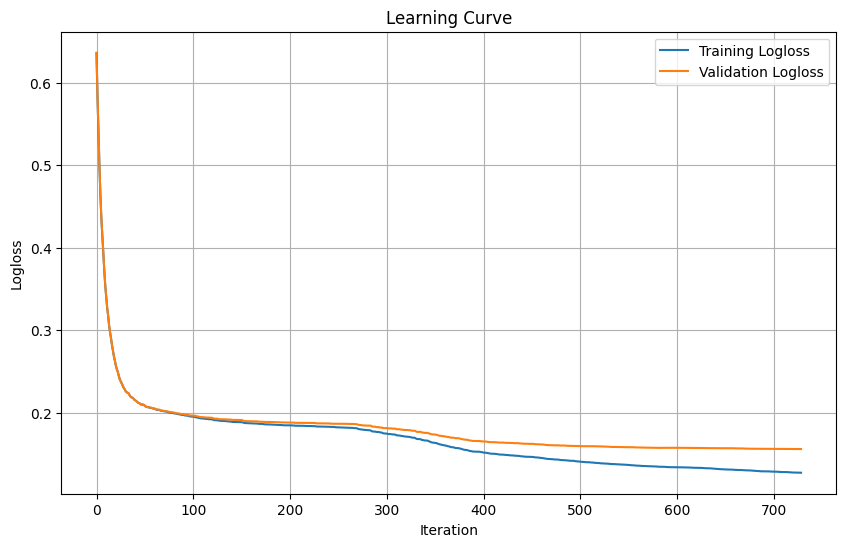

In [14]:
evals_result = final_model.get_evals_result()

# Menampilkan skor terakhir
train_score = evals_result['learn']['Logloss'][-1]
val_score = evals_result['validation']['Logloss'][-1]

print(f"Final Training Logloss: {train_score}")
print(f"Final Validation Logloss: {val_score}")

import matplotlib.pyplot as plt

# Ambil skor training dan validation dari evals_result
train_logloss = evals_result['learn']['Logloss']
val_logloss = evals_result['validation']['Logloss']

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_logloss, label='Training Logloss')
plt.plot(val_logloss, label='Validation Logloss')
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

Final Training Logloss: 0.14482801515145513
Final Validation Logloss: 0.1703206692296592


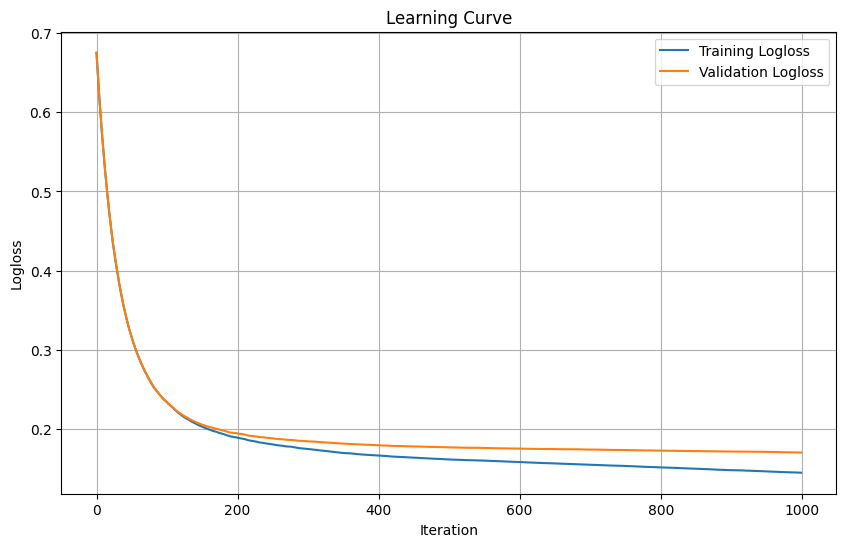

In [15]:
evals_result = model.get_evals_result()

# Menampilkan skor terakhir
train_score = evals_result['learn']['Logloss'][-1]
val_score = evals_result['validation']['Logloss'][-1]

print(f"Final Training Logloss: {train_score}")
print(f"Final Validation Logloss: {val_score}")

import matplotlib.pyplot as plt

# Ambil skor training dan validation dari evals_result
train_logloss = evals_result['learn']['Logloss']
val_logloss = evals_result['validation']['Logloss']

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_logloss, label='Training Logloss')
plt.plot(val_logloss, label='Validation Logloss')
plt.xlabel('Iteration')
plt.ylabel('Logloss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

0:	total: 75.1ms	remaining: 1m 15s
200:	total: 11.2s	remaining: 44.7s
400:	total: 22.6s	remaining: 33.8s
600:	total: 37.4s	remaining: 24.8s
800:	total: 55.8s	remaining: 13.9s
999:	total: 1m 8s	remaining: 0us
0:	total: 47.9ms	remaining: 47.8s
200:	total: 11.2s	remaining: 44.6s
400:	total: 23.9s	remaining: 35.7s
600:	total: 45.2s	remaining: 30s
800:	total: 56.4s	remaining: 14s
999:	total: 1m 8s	remaining: 0us
0:	total: 49.7ms	remaining: 49.6s
200:	total: 11.2s	remaining: 44.3s
400:	total: 24.4s	remaining: 36.4s
600:	total: 44.3s	remaining: 29.4s
800:	total: 59.1s	remaining: 14.7s
999:	total: 1m 10s	remaining: 0us
0:	total: 56.3ms	remaining: 56.2s
200:	total: 11.7s	remaining: 46.7s
400:	total: 28.1s	remaining: 42s
600:	total: 47.9s	remaining: 31.8s
800:	total: 1m	remaining: 15.1s
999:	total: 1m 11s	remaining: 0us
0:	total: 47.6ms	remaining: 47.5s
200:	total: 11.4s	remaining: 45.3s
400:	total: 28.8s	remaining: 43.1s
600:	total: 49.4s	remaining: 32.8s
800:	total: 1m 1s	remaining: 15.3s
999:

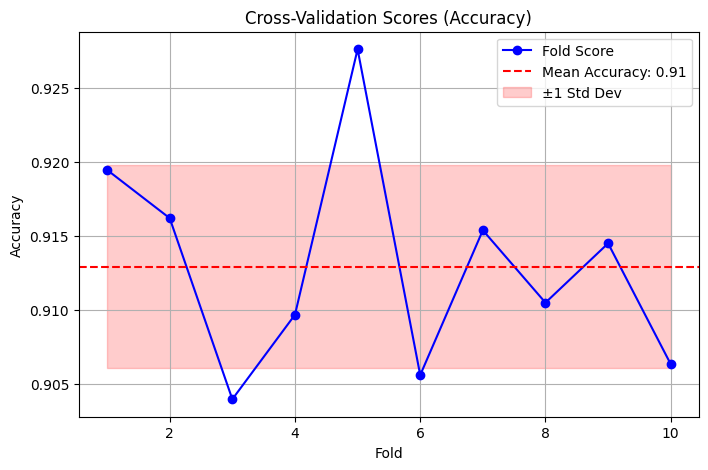

Accuracy Scores for each fold: [0.9194467  0.91619203 0.90398698 0.90968267 0.9275834  0.90561432
 0.91537836 0.91049634 0.91449511 0.90635179]
Mean Accuracy: 0.91
Standard Deviation: 0.01


In [16]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menghitung skor cross-validation dan visualisasi
def cross_validate_and_visualize_accuracy(model, X, y, cv=10):
    # Stratified K-Fold untuk mempertahankan distribusi label
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

    # Hitung skor cross-validation dengan metrik akurasi
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=skf)

    # Rata-rata dan standar deviasi
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    # Visualisasi hasil cross-validation
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, cv + 1), scores, marker='o', linestyle='-', color='b', label='Fold Score')
    plt.axhline(y=mean_score, color='r', linestyle='--', label=f'Mean Accuracy: {mean_score:.2f}')
    plt.fill_between(range(1, cv + 1), mean_score - std_score, mean_score + std_score, color='r', alpha=0.2, label='±1 Std Dev')
    plt.title('Cross-Validation Scores (Accuracy)')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Cetak hasil skor
    print(f'Accuracy Scores for each fold: {scores}')
    print(f'Mean Accuracy: {mean_score:.2f}')
    print(f'Standard Deviation: {std_score:.2f}')

# Contoh penggunaan
# Ganti model dengan model Anda, misalnya `model`
cross_validate_and_visualize_accuracy(model, X, y, cv=10)

0:	total: 67.4ms	remaining: 49.1s
100:	total: 9.39s	remaining: 58.4s
200:	total: 18.2s	remaining: 47.8s
300:	total: 26.9s	remaining: 38.3s
400:	total: 34.6s	remaining: 28.3s
500:	total: 42.3s	remaining: 19.3s
600:	total: 51.5s	remaining: 11s
700:	total: 1m 5s	remaining: 2.62s
728:	total: 1m 9s	remaining: 0us
0:	total: 117ms	remaining: 1m 25s
100:	total: 15.1s	remaining: 1m 33s
200:	total: 22.7s	remaining: 59.8s
300:	total: 28.5s	remaining: 40.5s
400:	total: 34.7s	remaining: 28.4s
500:	total: 41.8s	remaining: 19s
600:	total: 48.6s	remaining: 10.4s
700:	total: 56.4s	remaining: 2.25s
728:	total: 59.5s	remaining: 0us
0:	total: 101ms	remaining: 1m 13s
100:	total: 9.68s	remaining: 1m
200:	total: 18.7s	remaining: 49.1s
300:	total: 30.8s	remaining: 43.8s
400:	total: 41.4s	remaining: 33.9s
500:	total: 51.6s	remaining: 23.5s
600:	total: 59.2s	remaining: 12.6s
700:	total: 1m 7s	remaining: 2.69s
728:	total: 1m 10s	remaining: 0us
0:	total: 83.9ms	remaining: 1m 1s
100:	total: 9.63s	remaining: 59.9s


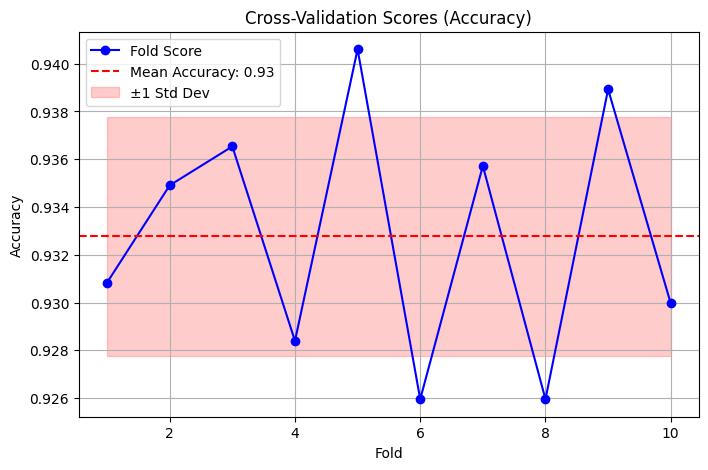

Accuracy Scores for each fold: [0.93083808 0.93490643 0.93653377 0.92839707 0.94060212 0.92595606
 0.9357201  0.92595606 0.93892508 0.92996743]
Mean Accuracy: 0.93
Standard Deviation: 0.01


In [17]:
cross_validate_and_visualize_accuracy(final_model, X, y, cv=10)

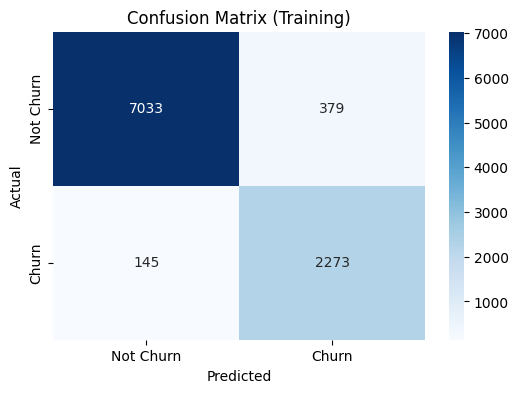

Training Metrics:
Accuracy: 0.95
Precision: 0.86
Recall: 0.94
F1 Score: 0.90
------------------------------


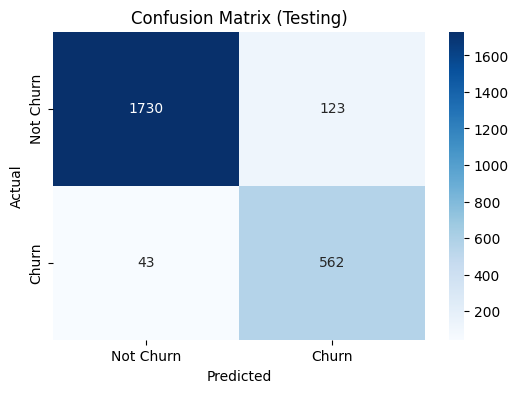

Testing Metrics:
Accuracy: 0.93
Precision: 0.82
Recall: 0.93
F1 Score: 0.87
------------------------------


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan confusion matrix dan metrik evaluasi
def evaluate_model(y_true, y_pred, dataset_name):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.show()
    
    # Hitung metrik evaluasi
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    print(f'{dataset_name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('-' * 30)

# Prediksi untuk data training dan testing
y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

# Evaluasi untuk data training
evaluate_model(y_train, y_train_pred, 'Training')

# Evaluasi untuk data testing
evaluate_model(y_test, y_test_pred, 'Testing')

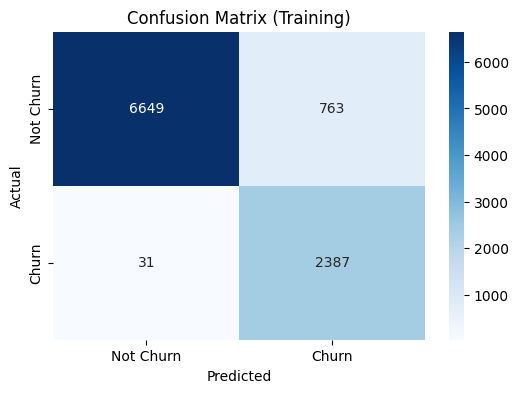

Training Metrics:
Accuracy: 0.92
Precision: 0.76
Recall: 0.99
F1 Score: 0.86
------------------------------


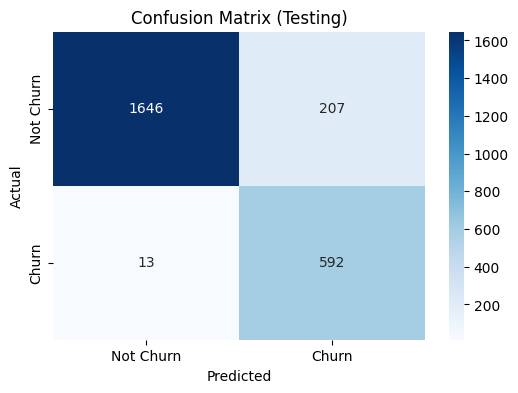

Testing Metrics:
Accuracy: 0.91
Precision: 0.74
Recall: 0.98
F1 Score: 0.84
------------------------------


In [19]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluasi untuk data training
evaluate_model(y_train, y_train_pred, 'Training')

# Evaluasi untuk data testing
evaluate_model(y_test, y_test_pred, 'Testing')

In [20]:
import pickle

with open('D:/Tugas Akhir/Codingan/Development/App/model/clasification_final_model_biasa.sav', 'wb') as f:
    pickle.dump(final_model, f)

with open('D:/Tugas Akhir/Codingan/Development/App/model/clasification_model_biasa.sav', 'wb') as f:
    pickle.dump(model, f)

In [21]:
df_test = pd.read_csv('D:/Tugas Akhir/Codingan/Development/App/data/df_test_YESUSFIX.csv')
df_test.head()

employee_id              domisili jenis_kelamin date_of_birth   join_date  \
0      EM6407  Kota Jakarta Selatan     Laki-laki    1981-03-05  2022-03-13   
1      EM6881             Tangerang     Laki-laki    1974-04-26  2022-04-11   
2      EM9588            Kota Depok     Perempuan    1980-01-08  2022-02-22   
3      EM6817    Kota Jakarta Timur     Perempuan    1985-06-15  2021-09-04   
4      EM0933    Kota Jakarta Timur     Laki-laki    1981-10-31  2022-03-20   

  resign_date marriage_stat  dependant education  absent_90D  ...  \
0  2023-08-08       Married          3        D3         3.0  ...   
1  2023-05-31       Married          0        D3         2.0  ...   
2  2023-08-30       Married          3        D1         4.0  ...   
3  2023-01-13       Married          2      SLTA        10.0  ...   
4  2024-09-08       Married          1      SLTA         7.0  ...   

   total_income_work income_dependant_ratio work_efficiency  \
0       1.169413e+08           1.719725e+06         1.22500   
1       1.369110e+08           1.053162e+07         1.17375   
2       1.408170e+08           1.955791e+06         1.18625   
3       3.969525e+07           8.269843e+05         1.13125   
4       2.918537e+08           4.864228e+06         1.14125   

   active_work_category  work_stability_score position_score  \
0              Mid-term              4.250000              4   
1              Mid-term              4.333333              4   
2              Mid-term              3.600000              4   
3              Mid-term              1.454545              1   
4              Mid-term              3.750000              4   

  job_income_position_score  education_score  education_income_ratio  \
0              1.719725e+06                4            1.719725e+06   
1              2.632904e+06                4            2.632904e+06   
2              1.955791e+06                2            3.911582e+06   
3              2.480953e+06                1            2.480953e+06   
4              2.432114e+06                1            9.728456e+06   

   weighted_satisfaction_performance  
0                                3.4  
1                                4.0  
2                                3.6  
3                                1.0  
4                                4.0  

[5 rows x 33 columns]

In [22]:
df_test['churn_status'].value_counts()

churn_status
1    335
Name: count, dtype: int64

In [23]:
X_test = df_test.drop(['churn_status', 'employee_id', 'date_of_birth', 'join_date', 
                       'resign_date', 'active_work_months'], axis=1)

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

y_pred = final_model.predict(X_test)

X_test['predicted_churn'] = y_pred

accuracy = accuracy_score(df_test['churn_status'], y_pred)
precision = precision_score(df_test['churn_status'], y_pred, zero_division=0)
recall = recall_score(df_test['churn_status'], y_pred, zero_division=0)
f1 = f1_score(df_test['churn_status'], y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8955223880597015
Precision: 1.0
Recall: 0.8955223880597015
F1 Score: 0.9448818897637795


In [24]:
X_test = df_test.drop(['churn_status', 'employee_id', 'date_of_birth', 'join_date', 'resign_date', 'active_work_months'], axis=1)

cat_feature = ['departemen', 'position', 'domisili', 'marriage_stat', 'job_satisfaction', 'performance_rating',
               'education', 'active_work_category', 'resign_risk_indicator', 'jenis_kelamin']

y_pred = model.predict(X_test)

X_test['predicted_churn'] = y_pred

accuracy = accuracy_score(df_test['churn_status'], y_pred)
precision = precision_score(df_test['churn_status'], y_pred, zero_division=0)
recall = recall_score(df_test['churn_status'], y_pred, zero_division=0)
f1 = f1_score(df_test['churn_status'], y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.982089552238806
Precision: 1.0
Recall: 0.982089552238806
F1 Score: 0.9909638554216867
